In [1]:
# Импорт базовых библиотек
import pandas as pd 
import numpy as np
import sklearn

In [2]:
# Фиксация random state для воспроизводимости результатов
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Словарь для сохранения лучших параметров моделей при поиске по сетке 
search_summaries = {}

# Главная метрика оценки
#  моделей
criterion = 'roc_auc' # 'f1'

In [3]:
# Загрузка датасета №4 в сsv
df = pd.read_csv('S06-hw-dataset-04.csv')
df.head()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
0,1,-1.250210,1.423474,-0.225004,-4.023138,-0.832729,-0.550874,1.772090,2.761690,-0.698750,...,10.938269,0.501178,1.600001,0.314212,1.209735,1.355697,-5.338924,1.153944,-0.153934,0
1,2,0.074328,0.376429,0.212831,-0.502074,2.017405,0.625496,1.943785,1.242030,-0.524090,...,7.775262,-4.550195,6.272586,-0.932162,-0.228543,1.735220,-3.827828,0.292165,0.273720,0
2,3,0.638481,0.060968,0.746760,2.479653,-0.292858,-0.078139,-2.918423,-0.013186,1.009135,...,-4.448447,-9.593179,-3.093519,0.029321,0.605511,0.829103,-0.085985,2.891408,0.766221,0
3,4,1.712916,-1.350969,-0.256473,1.622074,-0.445141,0.911932,-3.440345,1.505192,-1.104348,...,-1.619072,-3.237479,-5.474038,-1.582475,0.198137,3.823409,0.880395,1.148610,0.136732,0
4,5,0.905676,-0.206545,-0.068806,4.086026,-1.010045,-0.772644,-4.207688,2.506104,1.589143,...,-2.396844,-10.540129,-5.532811,-1.231203,0.000119,4.298572,-1.558235,0.924673,0.111668,0


In [4]:
# Удаление лишних пробклов в названии колонок
df.columns = [col.strip() for col in df.columns]
df.columns.tolist()

['id',
 'f01',
 'f02',
 'f03',
 'f04',
 'f05',
 'f06',
 'f07',
 'f08',
 'f09',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 'f58',
 'f59',
 'f60',
 'target']

Общие характеристики датасета №4
-------------------------

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      25000 non-null  int64  
 1   f01     25000 non-null  float64
 2   f02     25000 non-null  float64
 3   f03     25000 non-null  float64
 4   f04     25000 non-null  float64
 5   f05     25000 non-null  float64
 6   f06     25000 non-null  float64
 7   f07     25000 non-null  float64
 8   f08     25000 non-null  float64
 9   f09     25000 non-null  float64
 10  f10     25000 non-null  float64
 11  f11     25000 non-null  float64
 12  f12     25000 non-null  float64
 13  f13     25000 non-null  float64
 14  f14     25000 non-null  float64
 15  f15     25000 non-null  float64
 16  f16     25000 non-null  float64
 17  f17     25000 non-null  float64
 18  f18     25000 non-null  float64
 19  f19     25000 non-null  float64
 20  f20     25000 non-null  float64
 21  f21     25000 non-null  float64
 22

In [6]:
df.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,12500.500000,-0.000386,-0.004872,0.003202,0.335329,-0.000563,-0.010118,0.001182,0.957385,-0.004658,...,-0.166251,-3.387506,1.749793,-0.013017,-0.001383,0.893365,-0.909479,0.000570,-0.000754,0.04920
std,7217.022701,1.001623,0.995606,1.004367,3.207537,0.993965,1.002172,2.432162,1.830223,1.013470,...,4.234741,4.331576,5.318660,1.001594,0.996409,2.445185,1.962618,0.994320,0.997167,0.21629
min,1.000000,-4.370993,-4.087073,-4.103875,-13.249937,-4.118778,-3.895974,-8.883224,-8.132548,-4.068933,...,-20.021141,-18.332290,-20.336666,-4.349216,-4.119472,-9.508509,-7.919287,-4.038312,-3.812255,0.00000
25%,6250.750000,-0.680165,-0.675100,-0.675426,-1.750048,-0.669764,-0.674374,-1.647977,-0.217260,-0.688278,...,-2.897904,-6.278403,-1.775889,-0.689962,-0.676191,-0.735473,-2.226959,-0.666367,-0.665861,0.00000
50%,12500.500000,0.001859,-0.000247,0.013272,0.403483,-0.001309,-0.005994,-0.011349,0.963009,0.000414,...,-0.396946,-3.462072,1.931851,-0.020933,-0.004193,0.888535,-0.923354,0.004381,0.002420,0.00000
75%,18750.250000,0.679702,0.659523,0.683437,2.486453,0.672299,0.652629,1.658680,2.167758,0.681040,...,2.344956,-0.578540,5.473886,0.661300,0.673722,2.516790,0.395648,0.666474,0.665918,0.00000
max,25000.000000,4.208888,3.984564,3.793442,15.288250,4.020733,4.279607,9.538525,9.321099,4.261349,...,20.717964,18.818764,20.688069,4.338337,3.902131,11.880651,6.778980,3.834922,4.012639,1.00000


In [7]:
df['target'].value_counts(normalize=True)

target
0    0.9508
1    0.0492
Name: proportion, dtype: float64

Датасет содержит 25000 сэмплов полностью без пропусков, 60 фичей типа float64 и таргет типа int64 с значительным дисбалансом классов

Подготовка признаков и таргета
-------------------------

In [8]:
# Удаление колнки id
df = df.drop(columns=['id'])

In [9]:
# Исходные признаки и метки
X = df.iloc[:, :-1]
y = df["target"]

In [10]:
# Разбиение на трейн и тест с равным соотношением меток в выборках
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    random_state=RANDOM_STATE,
    stratify=y
)

Фиксированный seed

- Обеспечивает оспроизводимость результатов.
- Позволяет сравнивать модели и гарантирует стабильность экспериментов.

Стратификация

- Сохраняет пропорции классов в обучающей и тестовой выборках.
- Уменьшает риск смещения и неправильной оценки модели на несбалансированных данных.

Бэйзлайны
------------------------------

In [11]:
from sklearn.dummy import DummyClassifier  

dummy_most_frequent = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_most_frequent.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [12]:
dummy_stratified = DummyClassifier(strategy="stratified", random_state=42)
dummy_stratified.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [13]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression 

lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=1000,
        solver='liblinear'
    ))
])

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [14]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    f1_score,
    roc_auc_score,
    recall_score,
    RocCurveDisplay,
    confusion_matrix,
    precision_recall_curve, 
    average_precision_score
)

import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name='UnknownModel', as_dict=False):
    """Оценка модели на тестовых данных"""
    predicts = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]
    if not as_dict:
        print(f"""------------------------
Метрики {model_name}
------------------------
Accuracy: {accuracy_score(y_test, predicts):.4f}
Precision: {precision_score(y_test, predicts):.4f}
Recall: {recall_score(y_test, predicts):.4f}
F1: {f1_score(y_test, predicts):.4f}
ROC-AUC: {roc_auc_score(y_test, probas):.4f}
""")
    else:
        return {
            'accuracy': float(np.round(accuracy_score(y_test, predicts), 4)),
            'precision': float(np.round(precision_score(y_test, predicts), 4)),
            'recall': float(np.round(recall_score(y_test, predicts), 4)),
            'f1': float(np.round(f1_score(y_test, predicts), 4)),
            'roc_auc': float(np.round(roc_auc_score(y_test, probas), 4))
        }
    
def plot_roc(model, X_test, y_test, model_name='UnknownModel'):
    """Визуализация ROC-кривой"""
    y_probas = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(
        y_test,
        y_probas,
    )
    p = f'artifacts/figures/{model_name}_roc.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")

def plot_confusion_matrix(model, X_test, y_test, model_name='UnknownModel'):
    """Визуализация confusion matrix"""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG',
                xticklabels=['Ложные', 'Истинные'],
                yticklabels=['Ложные', 'Истинные'])
    
    plt.title('Матрица ошибок')
    plt.ylabel('Истинные метки')
    plt.xlabel('Предсказанные метки')
    p = f'artifacts/figures/{model_name}_confusion_matrix.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")
    plt.show()


def plot_pr(model, X_test, y_test, model_name='UnknownModel'):
    """Визуализация PR-кривой"""
    y_pred = model.predict(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    ap = average_precision_score(y_test, y_pred)

    plt.plot(recall, precision, label=f'PR curve (AP = {ap:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall кривая')
    plt.legend()
    p = f'artifacts/figures/{model_name}_pr_curve.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")
    plt.show()

In [15]:
evaluate_model(dummy_most_frequent, X_test, y_test, model_name='MostFrequentDummyClassifier')
evaluate_model(dummy_stratified, X_test, y_test, model_name='StratifiedDummyClassifier')
evaluate_model(lr_pipe, X_test, y_test, model_name='LRPipe')

------------------------
Метрики MostFrequentDummyClassifier
------------------------
Accuracy: 0.9508
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
ROC-AUC: 0.5000

------------------------
Метрики StratifiedDummyClassifier
------------------------
Accuracy: 0.9050
Precision: 0.0364
Recall: 0.0366
F1: 0.0365
ROC-AUC: 0.4933

------------------------
Метрики LRPipe
------------------------
Accuracy: 0.9632
Precision: 0.9079
Recall: 0.2805
F1: 0.4286
ROC-AUC: 0.8341



/home/ian/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dummy-классификаторы показывают достаточно высокие значения аккуратности, однако очень низкие значения точности, полноты и ROC-AUC, что говорит о том, что моделиь совсем не умеют различать классы объектов.
Несмотря на лучшие результаты среди всех бэйзлайн-моделей, логистическая регрессия все еще имеет низкие значение полноты (находит мало положительных(5% выборки) классов) и ROC-AUC (напрямую связано с низкой полнотой), что в общем и целом говорит о нелинейности в данных.

Эти модели задают нижний порог качества для оценки будущих моделей.

# Модели недели 6

Дерево решений

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Инициализация модели
model_name = 'DecisionTree'
dt_init = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Параметры для перебора
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Настройка GridSearchCV с кросс-валидацией 5 фолдов
grid_search = GridSearchCV(estimator=dt_init, param_grid=param_grid, cv=5, scoring=criterion, n_jobs=-1)
grid_search.fit(X_train, y_train)

dt = grid_search.best_estimator_
evaluate_model(dt, X_test, y_test, model_name=model_name)

------------------------
Метрики DecisionTree
------------------------
Accuracy: 0.9618
Precision: 0.8667
Recall: 0.2642
F1: 0.4050
ROC-AUC: 0.8161



График сохранен: artifacts/figures/DecisionTree_roc.png
График сохранен: artifacts/figures/DecisionTree_confusion_matrix.png


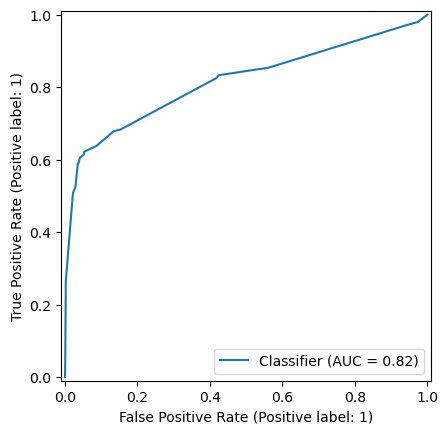

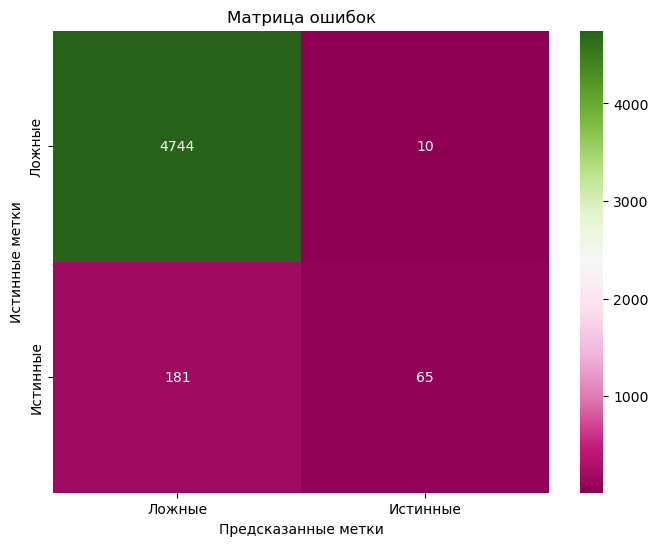

График сохранен: artifacts/figures/DecisionTree_pr_curve.png


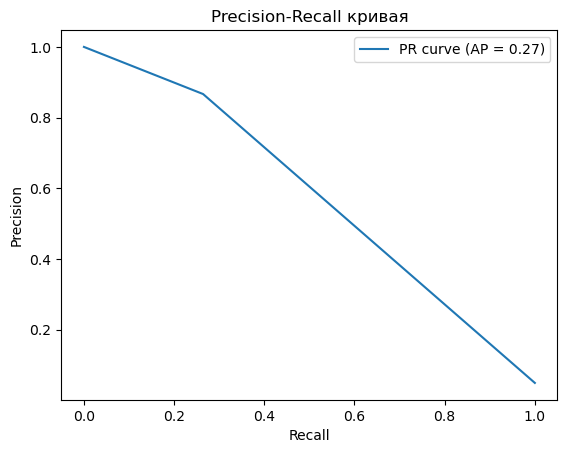

In [17]:
plot_roc(dt, X_test, y_test, model_name=model_name)
plot_confusion_matrix(dt, X_test, y_test, model_name=model_name)
plot_pr(dt, X_test, y_test, model_name=model_name)

In [18]:
search_summaries[model_name] = grid_search.best_params_
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

Случайный лес

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_name = 'RandomForest'
rf_init = RandomForestClassifier(random_state=RANDOM_STATE)
param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [3, 5, 10]}

grid_search = GridSearchCV(rf_init, param_grid, scoring=criterion, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

rf = grid_search.best_estimator_
evaluate_model(rf, X_test, y_test, model_name=model_name)


------------------------
Метрики RandomForest
------------------------
Accuracy: 0.9674
Precision: 0.9882
Recall: 0.3415
F1: 0.5076
ROC-AUC: 0.8922



График сохранен: artifacts/figures/RandomForest_roc.png
График сохранен: artifacts/figures/RandomForest_confusion_matrix.png


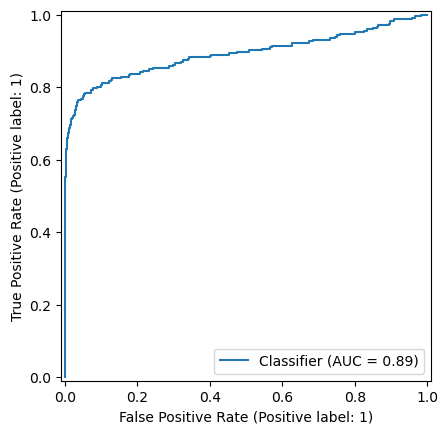

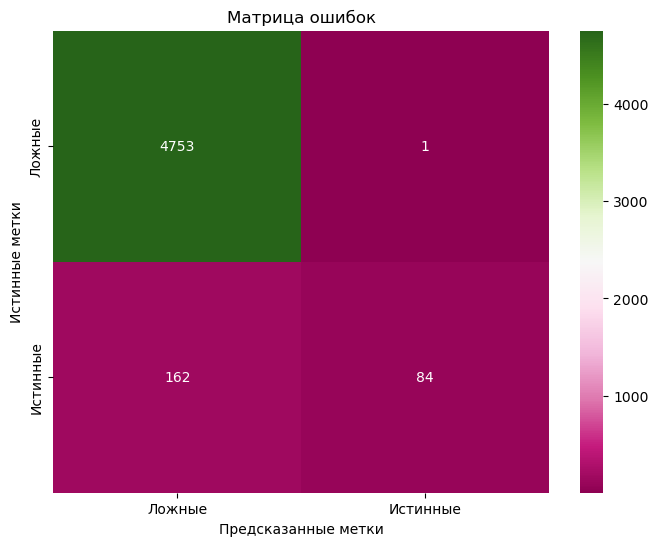

График сохранен: artifacts/figures/RandomForest_pr_curve.png


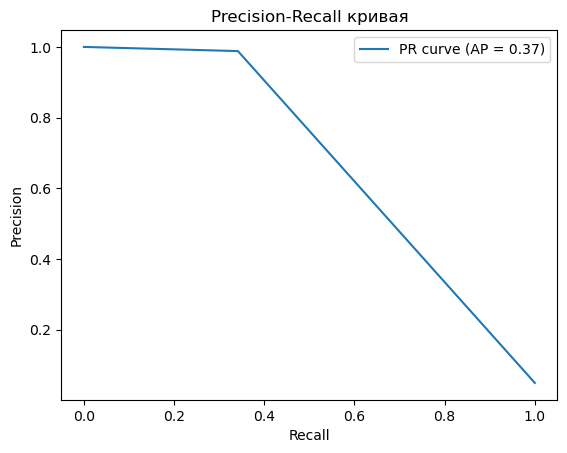

In [20]:
plot_roc(rf, X_test, y_test, model_name=model_name)
plot_confusion_matrix(rf, X_test, y_test, model_name=model_name)
plot_pr(rf, X_test, y_test, model_name=model_name)

In [21]:
search_summaries[model_name] = grid_search.best_params_
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 100}

Адаптивный бустинг

In [22]:
from sklearn.ensemble import AdaBoostClassifier

model_name = 'ApaBoost'
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_init = AdaBoostClassifier(estimator=base_estimator, random_state=RANDOM_STATE)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3]
}
grid_search = GridSearchCV(estimator=ada_init, param_grid=param_grid, cv=5, scoring=criterion, n_jobs=-1)
grid_search.fit(X_train, y_train)

ada = grid_search.best_estimator_
evaluate_model(ada, X_test, y_test, model_name=model_name)

------------------------
Метрики ApaBoost
------------------------
Accuracy: 0.9726
Precision: 1.0000
Recall: 0.4431
F1: 0.6141
ROC-AUC: 0.8873



График сохранен: artifacts/figures/ApaBoost_roc.png
График сохранен: artifacts/figures/ApaBoost_confusion_matrix.png


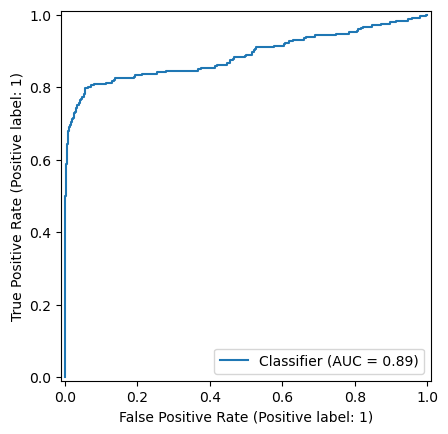

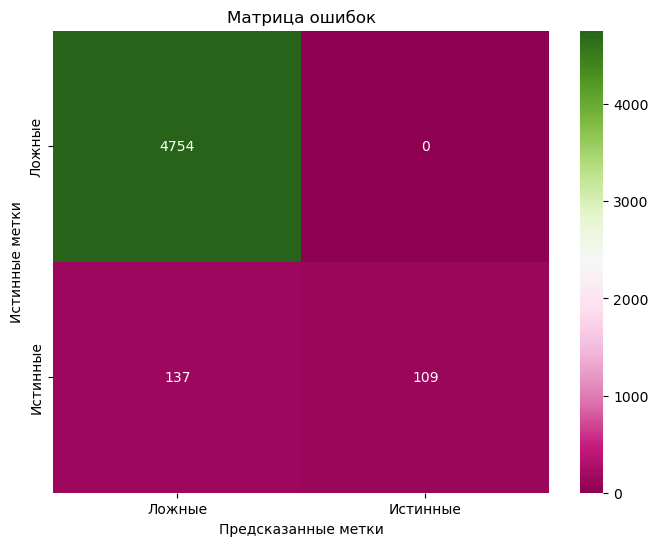

График сохранен: artifacts/figures/ApaBoost_pr_curve.png


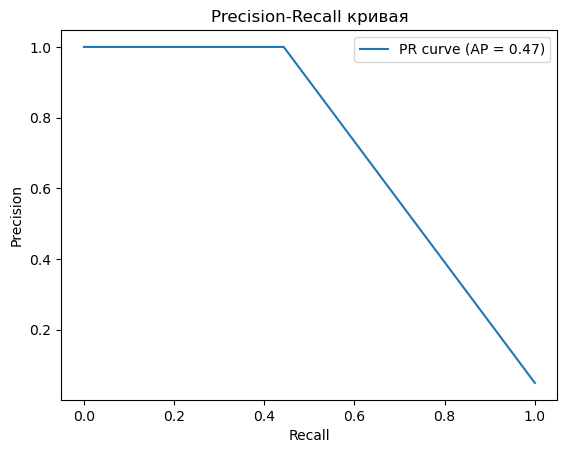

In [23]:
plot_roc(ada, X_test, y_test, model_name=model_name)
plot_confusion_matrix(ada, X_test, y_test, model_name=model_name)
plot_pr(ada, X_test, y_test, model_name=model_name)

In [24]:
search_summaries[model_name] = grid_search.best_params_
grid_search.best_params_

{'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}

Стэкинг

In [25]:
from sklearn.ensemble import StackingClassifier

model_name = 'StackingClassifier'
# Определяем базовые модели
base_estimators = [
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE)),
    ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ('ada', AdaBoostClassifier(random_state=RANDOM_STATE))
]
meta_estimator = LogisticRegression(max_iter=1000, random_state=42)

# Создаем стекинг-классификатор
stack_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_estimator,
    cv=5, 
    stack_method='predict_proba', 
    n_jobs=-1
)

# Обучаем стекинг
stack_clf.fit(X_train, y_train)
evaluate_model(stack_clf, X_test, y_test, model_name=model_name)

------------------------
Метрики StackingClassifier
------------------------
Accuracy: 0.9808
Precision: 0.9630
Recall: 0.6341
F1: 0.7647
ROC-AUC: 0.9016



График сохранен: artifacts/figures/StackingClassifier_roc.png
График сохранен: artifacts/figures/StackingClassifier_confusion_matrix.png


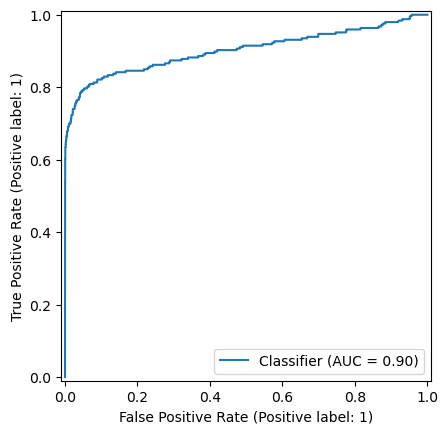

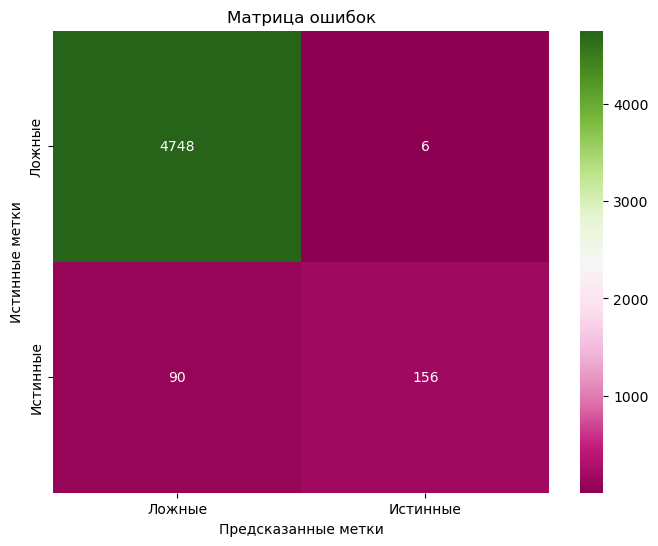

График сохранен: artifacts/figures/StackingClassifier_pr_curve.png


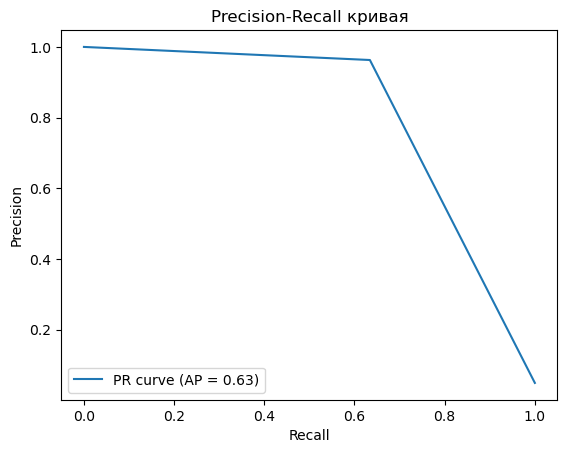

In [26]:
plot_roc(stack_clf, X_test, y_test, model_name=model_name)
plot_confusion_matrix(stack_clf, X_test, y_test, model_name=model_name)
plot_pr(stack_clf, X_test, y_test, model_name=model_name)

In [36]:
stack_clf.final_estimator_.coef_

array([[13.16623039,  0.88932095,  2.20510493]])

# Результаты

In [27]:
def compare_models_metrics(models_dict, X_test, y_test):
    """Сравнение метрик нескольких моделей"""
    
    all_metrics = []
    
    for model_name, model in models_dict.items():
        y_pred = model.predict(X_test)
        
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        
        metrics = {
            'model': model_name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc
        }
        
        all_metrics.append(metrics)
    
    results_df = pd.DataFrame(all_metrics)
    
    # Сортировка по f1
    results_df = results_df.sort_values(criterion, ascending=False).reset_index(drop=True)
    
    return results_df

In [28]:
models = {
    # бейзлайны
    'MostFrequent': dummy_most_frequent, # самый частый
    'Stratified': dummy_stratified, # случайный с сохранением распределения
    'LRPipe': lr_pipe, # логистическая регрессия
    'DecisionTree': dt, # дерево решений
    'RandomForest': rf, # случайный лес
    'AdaBoost': ada, # адаптивный бустинг
    'StackingClassifier': stack_clf # стакинг dt rf ada -> lr
}

comparison_df = compare_models_metrics(models, X_test, y_test)
p = 'artifacts/metrics_test.csv'
comparison_df.to_csv(p, index=False, float_format='%.4f')
print(f"Метрики сохранены: {p}")
comparison_df

/home/ian/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Метрики сохранены: artifacts/metrics_test.csv


,model,accuracy,precision,recall,f1,roc_auc
0,StackingClassifier,0.9808,0.962963,0.634146,0.764706,0.901571
1,RandomForest,0.9674,0.988235,0.341463,0.507553,0.892172
2,AdaBoost,0.9726,1.000000,0.443089,0.614085,0.887345
3,LRPipe,0.9632,0.907895,0.280488,0.428571,0.834071
4,DecisionTree,0.9618,0.866667,0.264228,0.404984,0.816099
5,MostFrequent,0.9508,0.000000,0.000000,0.000000,0.500000
6,Stratified,0.9050,0.036437,0.036585,0.036511,0.493261


In [29]:
best_model_name = comparison_df['model'][0]
best_model = models[best_model_name]

Permutaion importance (top-15 признаков)

График сохранен: artifacts/figures/StackingClassifier_permutation_importance.png


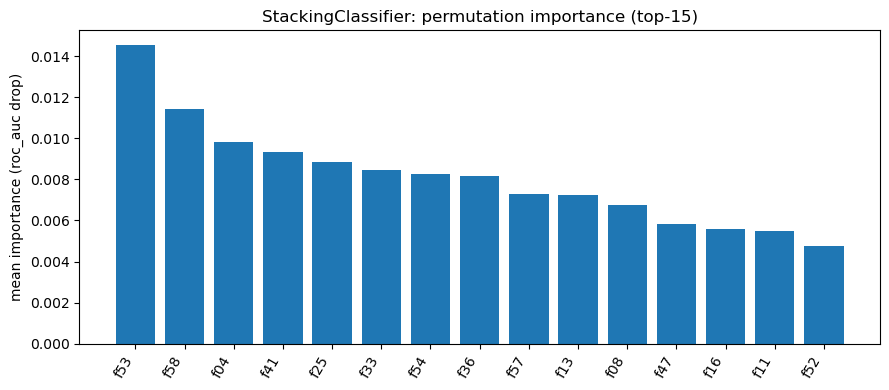

In [30]:
from sklearn.inspection import permutation_importance

scoring = criterion if hasattr(best_model, "predict_proba") else "accuracy"

perm = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=8,
    random_state=RANDOM_STATE,
    scoring=scoring
)

imp = perm.importances_mean
idx = np.argsort(imp)[::-1][:15]

plt.figure(figsize=(9, 4))
plt.bar(range(len(idx)), imp[idx])
plt.xticks(range(len(idx)), [X_test.columns[i] for i in idx], rotation=60, ha="right")
plt.ylabel(f"mean importance ({scoring} drop)")
plt.title(f"{best_model_name}: permutation importance (top-15)")
plt.tight_layout()
p = f'artifacts/figures/{best_model_name}_permutation_importance.png'
plt.savefig(p)
print(f"График сохранен: {p}")
plt.show()

Наиболее влиятельными оказались признаки под номерами 53, 58, 4, 41 и 25. Значения важности всех признаков близки к 0. Ожиданий по данным не было, так как датасет полностью синтетический и не относится к какой-либо предметной области. 

In [31]:
import json

# Сохранение лучших параметров моделей в json
with open("artifacts/search_summaries.json", "w") as f:
    json.dump(search_summaries, f, indent=4)

In [32]:
def filter(d):
    """Замена не json-serializable объектов строками"""
    if isinstance(d, dict):
        filtered = {}
        for k, v in d.items():
            filtered[k] = filter(v)
        return filtered
    elif isinstance(d, list):
        return [filter(i) for i in d]
    elif isinstance(d, tuple):
        return tuple(filter(i) for i in d)
    elif isinstance(d, (str, int, float, bool, type(None))):
        return d
    else:
        return d.__class__.__name__


In [33]:
import joblib

# Сохранение лучшей модели
joblib.dump(best_model, "artifacts/best_model.joblib")

# Сохранение метаданных лучшей модели
with open("artifacts/best_model_meta.json", "w") as f:
    meta = {
        'Лучшая модель': best_model_name,
        'Параметры': best_model.get_params(),
        'Метрики на test': evaluate_model(best_model, X_test, y_test, as_dict=True)
    }
    json.dump(filter(meta), f, indent=4, ensure_ascii=False,)


Exception ignored in: <function ResourceTracker.__del__ at 0x77018078d3a0>
Traceback (most recent call last):
  File "/home/ian/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/ian/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/ian/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x75b0869813a0>
Traceback (most recent call last):
  File "/home/ian/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/ian/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/ian/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7098c0d